In [1]:
import pandas as pd
%matplotlib inline

In [2]:
csv_path = '../views_and_main_tables/involved.csv'
df = pd.read_csv(csv_path)

In [3]:
def show_cols_with(string):
    
    for col in sorted(df.columns):

        if string not in col:
            continue

        print(col)

show_cols_with('year')

accident_year


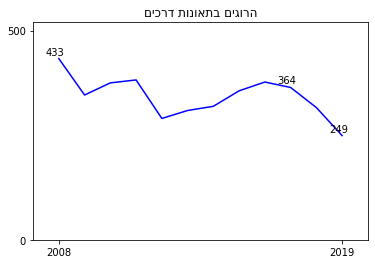

In [4]:
# Query the data

sr = df[df.injury_severity == 1].accident_year.value_counts().sort_index()


# Plot the query results (according to 2017 report)

ax = sr.plot.line(

    title=''.join(reversed('הרוגים בתאונות דרכים')),
    color='blue',
    
    xlim=(
        sr.index[ 0] - 1,
        sr.index[-1] + 1,
    ),
    ylim=(0, sr.max() * 1.2),
    
    xticks=sr.index[[0, -1]],
    yticks=[0, 500],

)


# Annotate the plot

val_range = sr.max() - sr.min()

for year, val in sr[[2008, 2017, 2019]].items():
    ax.annotate(val, xy=(year - .5, val + .05 * val_range));
